# Introduction

A CNN also called convnet or Convolutional Neural Network is applied in.

    Computer Vision Application
    Recognise handwritten digits and characters
    Recognise objects in images and video
    Non vision applications - natural language processing, recommender systems

The CIFAR-10 and CIFAR-100 are labeled subsets of the 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. 
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

In [1]:
#Loading the data
from tensorflow.keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
#Loading packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import datetime, os
%matplotlib inline

In [4]:
#Reproducibility of results
np.random.seed(47)

# Exploratory Data Analysis

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_test.shape

(10000, 1)

In [10]:
y_train[5][0]

1

C:\Users\Rush\.conda\envs\deeplearning\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


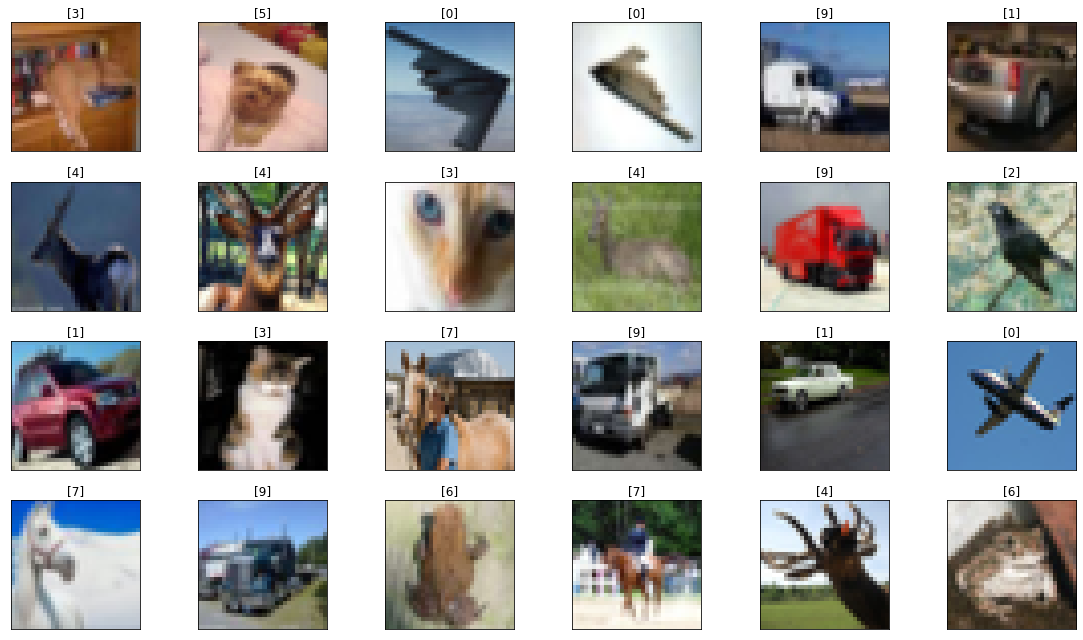

In [11]:
index=np.random.choice(np.arange(len(X_train)), 24, replace = False) #24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16,9))
for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) #remove x-axis marks
    axes.set_yticks([]) #remove y-axis marks
    axes.set_title(target)
plt.tight_layout()

# Data Preparation

In [12]:
#keras - Numpy arrays as inputs
#each sample must have a shape
#(width, height, channels)

#each pixel has three channels - [RGB]
#sample sizes (32,32,3)
#neural network learns from the shapes - more channels are created
#as more channels are being  built - represent more complex features

In [13]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [14]:
#we need to normalize the image data.
#normalized data 0(mean) - 1(std) - /255


In [15]:
X_train = X_train.astype('float32')/255

In [16]:
X_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [17]:
X_test= X_test.astype('float32')/255

In [18]:
X_test[0]

array([[[0.61960787, 0.4392157 , 0.19215687],
        [0.62352943, 0.43529412, 0.18431373],
        [0.64705884, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254903, 0.14117648],
        [0.49411765, 0.35686275, 0.14117648],
        [0.45490196, 0.33333334, 0.12941177]],

       [[0.59607846, 0.4392157 , 0.2       ],
        [0.5921569 , 0.43137255, 0.15686275],
        [0.62352943, 0.44705883, 0.1764706 ],
        ...,
        [0.53333336, 0.37254903, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509805, 0.13333334]],

       [[0.5921569 , 0.43137255, 0.18431373],
        [0.5921569 , 0.42745098, 0.12941177],
        [0.61960787, 0.43529412, 0.14117648],
        ...,
        [0.54509807, 0.38431373, 0.13333334],
        [0.50980395, 0.37254903, 0.13333334],
        [0.47058824, 0.34901962, 0.12941177]],

       ...,

       [[0.26666668, 0.4862745 , 0.69411767],
        [0.16470589, 0.39215687, 0.5803922 ],
        [0.12156863, 0

In [19]:
#One hot encoding

In [20]:
y_train[10][0]

4

In [21]:
from tensorflow.keras.utils import to_categorical

In [22]:
y_train=to_categorical(y_train)

In [23]:
y_train.shape

(50000, 10)

In [24]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [25]:
y_test= to_categorical(y_test)

In [26]:
y_test.shape

(10000, 10)

# Creating the Neural Network

In [27]:
#Sequential model - stacks layers so as to execute sequentialy
#The output of one layer is the input of the next
#Feedforward network

In [28]:
from tensorflow.keras.models import Sequential

In [29]:
cnn = Sequential()

In [30]:
#adding the layers to the network

In [31]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D

In [32]:
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3))) # filters give us the feature map

Overfitting

    too complex compared to what the model is modelling
    memorize the data features

Adding a pooling layer

    to reduce overfitting and computational time - reduce dimensionality
    compress (down - samples ) - discarding features to generalize very well
    Max pooling is usually used , examines 2*2 square features and keeps only the maximum values



In [33]:
cnn.add(MaxPool2D(pool_size=(2,2)))

In [34]:

cnn.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu')) # filters give us the feature map

In [35]:
cnn.add(MaxPool2D(pool_size=(2,2)))

# Flattening the results

In [36]:
cnn.add(Flatten())

# Adding a dense layer

In [37]:
cnn.add(Dense(units=128, activation='relu'))

In [38]:
#Softmax that converts values to probabilities
cnn.add(Dense(units=10, activation='softmax'))

In [39]:
#Summary of the model - shape, number of parameters, 

In [40]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [41]:
#Visualize the model structure

In [42]:
from tensorflow.keras.utils import plot_model

In [43]:
from IPython.display import Image

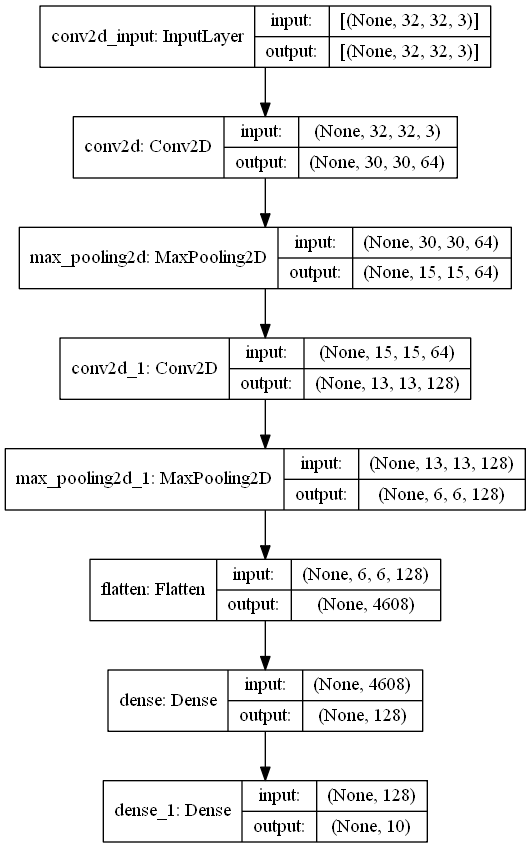

In [44]:
plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png')

In [45]:
#Compile the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
cnn

# Tensorboard

In [47]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [48]:
cnn.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, callbacks=[tensorboard_callback])

Epoch 1/10
704/704 [==============================] - 69s 98ms/step - loss: 1.4107 - accuracy: 0.4962 - val_loss: 1.1810 - val_accuracy: 0.5942
Epoch 2/10
704/704 [==============================] - 67s 95ms/step - loss: 1.0499 - accuracy: 0.6326 - val_loss: 0.9539 - val_accuracy: 0.6680
Epoch 3/10
704/704 [==============================] - 67s 95ms/step - loss: 0.8991 - accuracy: 0.6888 - val_loss: 0.9116 - val_accuracy: 0.6880
Epoch 4/10
704/704 [==============================] - 67s 96ms/step - loss: 0.7945 - accuracy: 0.7271 - val_loss: 0.8502 - val_accuracy: 0.7084
Epoch 5/10
704/704 [==============================] - 66s 94ms/step - loss: 0.7030 - accuracy: 0.7532 - val_loss: 0.8577 - val_accuracy: 0.7052
Epoch 6/10
704/704 [==============================] - 66s 94ms/step - loss: 0.6255 - accuracy: 0.7828 - val_loss: 0.8619 - val_accuracy: 0.7060
Epoch 7/10
704/704 [==============================] - 67s 95ms/step - loss: 0.5438 - accuracy: 0.8109 - val_loss: 0.8769 - val_accuracy:

In [49]:
%load_ext tensorboard

In [53]:
#Scalars
%tensorboard --logdir logs

In [55]:
#Scalars
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 7896), started 0:00:35 ago. (Use '!kill 7896' to kill it.)

In [56]:
#Distributions
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 7896), started 0:00:49 ago. (Use '!kill 7896' to kill it.)

In [57]:
#Histograms
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 7896), started 0:01:06 ago. (Use '!kill 7896' to kill it.)

# Model Evaluation

In [58]:
loss,accuracy=cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 14ms/step - loss: 1.0347 - accuracy: 0.7075


In [59]:
loss

1.0346763134002686

In [60]:
accuracy

0.7074999809265137

In [61]:
#Making predictions with predict method

In [62]:
predictions=cnn.predict(X_test)

In [63]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [64]:
predictions[0]

array([1.4812460e-05, 3.2157823e-06, 3.1579443e-06, 9.7572339e-01,
       2.4656811e-07, 2.4185466e-02, 6.2359162e-05, 1.6678096e-07,
       6.9981384e-06, 1.7057414e-07], dtype=float32)

In [65]:
for index, probability in enumerate(predictions[0]):
    print(f'{index} : {probability: .10%}')

0 :  0.0014812460%
1 :  0.0003215782%
2 :  0.0003157944%
3 :  97.5723385811%
4 :  0.0000246568%
5 :  2.4185465649%
6 :  0.0062359162%
7 :  0.0000166781%
8 :  0.0006998138%
9 :  0.0000170574%


In [66]:
#Locating Incorrect predictions

In [67]:
images=X_test.reshape((10000,32,32,3))

In [68]:
incorrect_predictions = []

In [69]:
for i, (p,e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    if predicted != expected:
        incorrect_predictions.append((i,images[i], predicted, expected))

In [70]:
len(incorrect_predictions)

2925

In [71]:
y_test.shape

(10000, 10)

In [72]:
((10000-2961)/10000) * 100

70.39

AttributeError: module 'matplotlib.pyplot' has no attribute 'tightlayout'

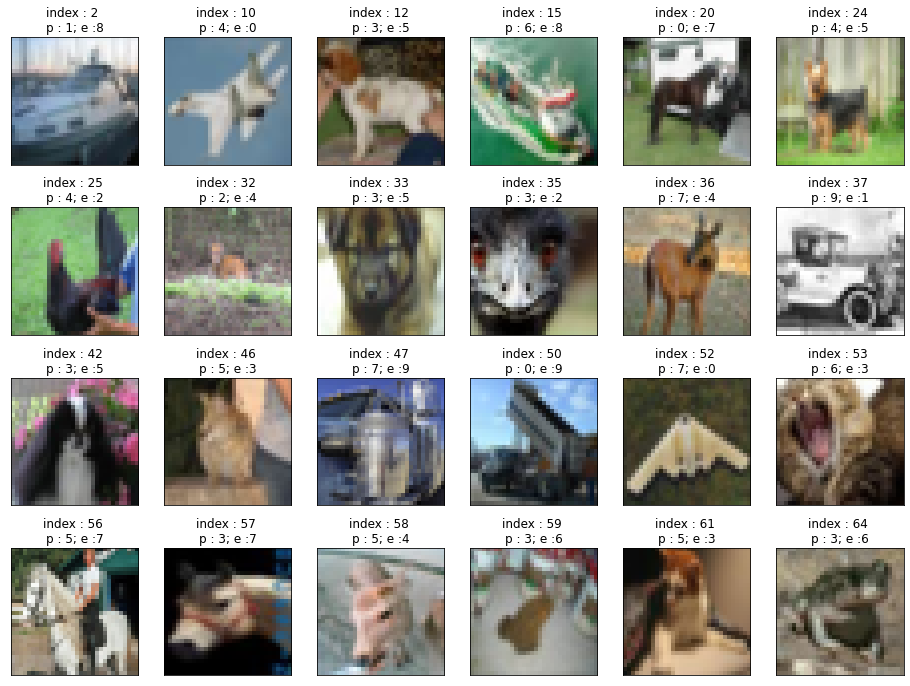

In [73]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16,12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(f'index : {index} \np : {predicted}; e :{expected}')
plt.tightlayout()

In [74]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability: .10%}')

In [75]:
display_probabilities(predictions[1232])

0:  0.0000392002%
1:  99.9999165535%
2:  0.0000000054%
3:  0.0000001954%
4:  0.0000001495%
5:  0.0000000072%
6:  0.0000000024%
7:  0.0000000000%
8:  0.0000000000%
9:  0.0000466885%


In [76]:
cnn.save('cifar10_cnn.h5')